# Visualizing NYC Taxi Trips with Datashader, Altair, and Panel

In [1]:
import numpy as np
import pandas as pd
import altair as alt

import dask.dataframe as dd
import holoviews as hv
import geoviews.tile_sources as gts
import param as pm
import panel as pn
import colorcet
from holoviews.operation.datashader import rasterize, shade, spread

In [2]:
alt.renderers.enable('notebook');

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
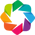

In [3]:
hv.extension('bokeh')

In [4]:
pn.extension('vega');

First, we'll get the data into a Pandas dataframe:

Now let's define a couple of user-settable parameters (the year and whether to show a legend), then write methods to plot this data with Matplotlib, Plotly, Altair (using Vega), and hvPlot (using HoloViews and Bokeh):

# Load the full data set

In [5]:
usecols = ['dropoff_x','dropoff_y','pickup_x','pickup_y','dropoff_hour','pickup_hour','passenger_count']
df = dd.read_parquet('data/nyc_taxi_wide.parq')[usecols].persist()

# Build the app

In [6]:
cmaps = dict(
    [(n, colorcet.palette[n]) for n in ["bgy", "fire", "bgyw", "bmy", "gray", "kbc"]]
)

maps = ["CartoDark", "CartoLight"]
bases = dict([(name, gts.tile_sources[name].relabel(name)) for name in maps])
gopts = hv.opts.WMTS(
    responsive=True, xaxis=None, yaxis=None, bgcolor="black", show_grid=False
)


In [18]:
class NYCTaxiExplorer(pm.Parameterized):

    hour = pm.Range(default=(0, 24), bounds=(0, 24))
    location = pm.ObjectSelector(default="dropoff", objects=["dropoff", "pickup"])

    cmap = pm.Selector(cmaps)
    spreading = pm.Integer(0, bounds=(0, 5))

    basemap = pm.Selector(bases)
    data_opacity = pm.Magnitude(1.00)
    map_opacity = pm.Magnitude(0.75)
    show_labels = pm.Boolean(False)

    # the x-axis selection on the daily shootings chart
    box = hv.streams.RangeXY(x_range=None, y_range=None)

    @pm.depends("location", "hour")
    def points(self, x_range=None, y_range=None):

        xcol = self.location + "_x"
        ycol = self.location + "_y"
        points = hv.Points(df, kdims=[xcol, ycol], vdims=["dropoff_hour"])

        # trim by dropoff hour
        if self.hour != (0, 24):
            points = points.select(dropoff_hour=self.hour)

        # trim by x range of plot
        if x_range is not None:
            points = points.select(**{xcol: x_range})

        # trim by y range of plot
        if y_range is not None:
            points = points.select(**{ycol: y_range})

        return points

    @pm.depends("map_opacity", "basemap")
    def tiles(self):
        return self.basemap.opts(gopts).opts(alpha=self.map_opacity)

    @pm.depends("show_labels")
    def labels(self):
        return gts.StamenLabels.options(
            level="annotation", alpha=1 if self.show_labels else 0
        )

    def heatmap(self, **kwargs):

        self.box.source = self.points
        points = hv.DynamicMap(self.points, streams=[self.box])
        rasterized = rasterize(points, width=800, height=400)
        shaded = shade(rasterized, cmap=self.param.cmap, normalization="eq_hist")
        spreaded = spread(shaded, px=self.param.spreading, how="add")
        dataplot = spreaded.apply.opts(alpha=self.param.data_opacity, show_legend=False)

        final = hv.DynamicMap(self.tiles) * dataplot * hv.DynamicMap(self.labels)
        return final.options(
            default_tools=["save", "pan", "box_zoom", "reset"],
            active_tools=["box_zoom"],
        )

    @pm.depends("hour", "box.x_range", "box.y_range")
    def passenger_hist(self):

        points = self.points(x_range=self.box.x_range, y_range=self.box.y_range)
        N, edges = np.histogram(points.data.passenger_count, bins="auto")
        centers = 0.5 * (edges[1:] + edges[:-1])
        hist = pd.DataFrame({"Number of Trips": N, "Number of Passengers": centers})

        chart = (
            alt.Chart(hist)
            .mark_bar()
            .encode(x="Number of Passengers", y="Number of Trips")
            .properties(
                width=500,
                height=300)
        )

        return pn.Pane(chart, width=800, height=300)


taxi = NYCTaxiExplorer(name="")

In [19]:
altair_title = "<h3>How Many Passengers Does a Typical Taxi Trip Have?<h3>"

In [21]:
panel = pn.Column(
    pn.Row(pn.Param(taxi.param, expand_button=False), taxi.heatmap(), width=800),
    pn.Row(
        pn.Column(pn.Row(altair_title, align="center", width=800), 
                  pn.Row(taxi.passenger_hist),
                 width=800, align='center'
                 ),
        width=800,
        align="center",
    ),
)
panel.servable()

Column
    [0] Row(width=800)
        [0] Param(NYCTaxiExplorer, expand_button=False)
        [1] HoloViews(DynamicMap)
    [1] Row(align='center', width=800)
        [0] Column(align='center', width=800)
            [0] Row(align='center', width=800)
                [0] Markdown(str, width=800)
            [1] Row
                [0] ParamMethod(method)